# Gelişmiş Fonksiyonel Keşifçi Veri Analizi(Advanced Functional Eda)

* 1. Genel Resim 
* 2. Kategorik Değişken Analizi (Analysis of Categorical Variables) 
* 3. Sayısal Değişken Analizi (Analysis of Numerical Variables) 
* 4. Hedef Değişken Analizi (Analysis of Target Variables) 
* 5. Korelasyon Analizi (Analysis of Correlation) 

### Genel Resim

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns',None)
df = sns.load_dataset("titanic") 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# veri ilk elimize geldiğinde uygulayacaklarımız

df.head() 
df.tail() 
df.shape 
df.info 
df.columns 
df.index 
df.describe().T 
df.isnull().values.any() 
df.isnull().sum()



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
def check_df(dataframe, head = 5):
    print("####################### shape ##########################")  
    
    print(dataframe.shape) 
    
    print("####################### types ##########################")   
    
    print(dataframe.dtypes) 

    print("####################### head ##########################")  
    
    print(dataframe.head) 

    
    print("####################### tail ##########################")  
    
    print(dataframe.tail)
    
    print("####################### NA ##########################")   
    
    print(dataframe.isnull().sum)

check_df(df) 

####################### shape ##########################
(891, 15)
####################### types ##########################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
####################### head ##########################
<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3

In [4]:
#df = sns.load_dataset("tips") 
#check_df(df)

### 2. Kategorik Değişken Analizi( Analysis of Categorical Variables )  ***

In [5]:
# bunları tek tek yazmak yerine sistematik şekilde ve daha kısa şekilde yazalım 

df["embarked"].value_counts() 
df["sex"].unique() 
df["class"].nunique() 

3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# kategorik değişkenler 
# bool 
# object 
# category
# survived 
# uçakta first class- economy etc 


In [8]:
# kategorik değişkenleri bulduk 
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"] ] 

cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [9]:
# tipi int veya float olup sınır sayısı küçük olanları alalım (numerik kategorik değişken)
num_but_cat = [col for col in  df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]  
num_but_cat

[]

In [10]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and (str(df[col].dtypes).startswith(('int' or 'float')))]

In [11]:
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [12]:
# object tipinde kategorik değişken var ama sayısı fazla olabilir (kalibresi yüksek veriler ölçülemeyecek kadar fazla sınıfı var) 


cat_but_cat = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["int","float64"]] 
cat_but_cat

['age', 'fare']

In [13]:
# hepsi aynı yerde 
cat_cols = cat_cols + num_but_cat

In [14]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [15]:
# cat_but_catten değişken geldiği için çıkaracağız yani şöyle 

cat_cols = [col for col in cat_cols if col not in cat_but_cat]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [16]:
# kategorik değişkenleri dataframe de gösterme
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [17]:
# tutarlı mı ? 

df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [18]:
# sayısallar yani cat_cos içinde olmayanlar 

[col for col in df.columns if col not in cat_cols]

['age', 'fare']

In [19]:
# seçtik şimdi fonksiyon yazacağız 
df["survived"].value_counts() 
100 * df["survived"].value_counts() / len(df)

def cat_summary(dataframe , col_name): 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)})) 

print("#########################################################")   
    
cat_summary(df,"sex") 


#########################################################
        sex      Ratio
male    577  64.758698
female  314  35.241302


In [20]:
#kısa yol 

for col in cat_cols: 
    cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
     alive      Ratio
no     549  61.616162
yes    342  38.383838
       alone     Ratio
True     537  60.26936
False    354  39.73064
   survived      Ratio
0       549  61.616162
1       342  38.383838
   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  2

### Kategorik Değişken Analizi (Analysis of Categorical Variables ) 

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################################################


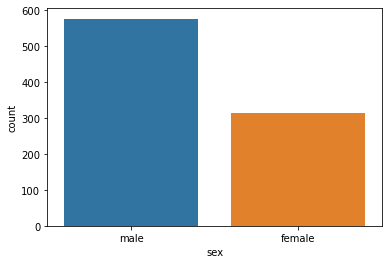

In [21]:
def cat_summary(dataframe , col_name, plot = False): 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)})) 

    print("#########################################################")    
    if plot: 
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show(block=True)

cat_summary(df , "sex", plot= True)



        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################################################


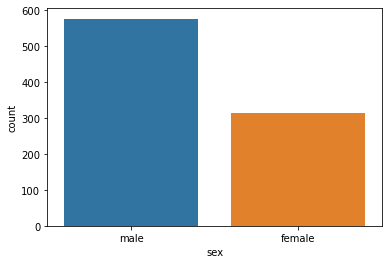

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################################################


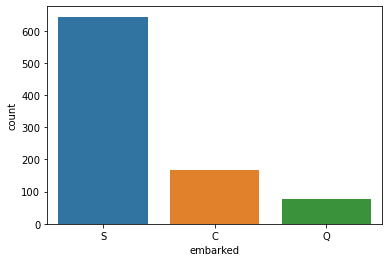

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################################################


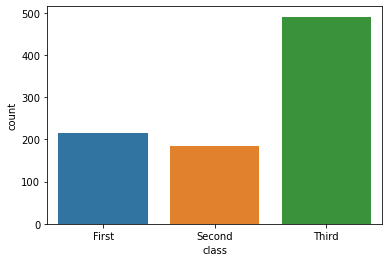

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################################################


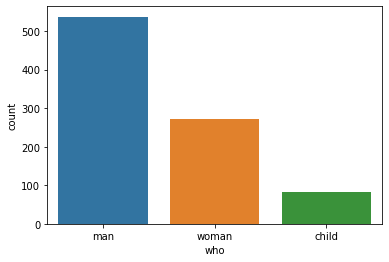

##################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################################################


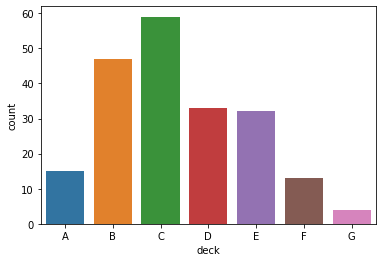

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################################################


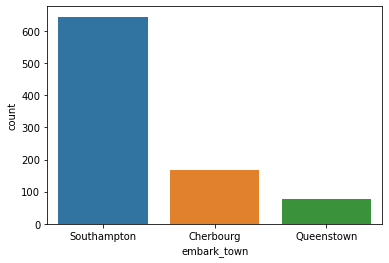

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################################################


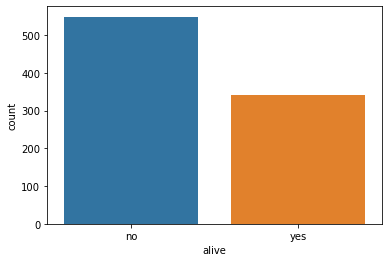

##################
   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################################################


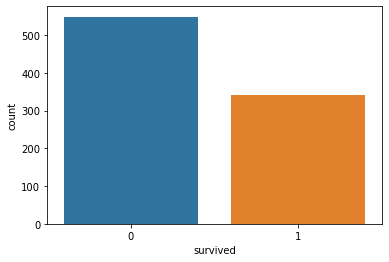

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#########################################################


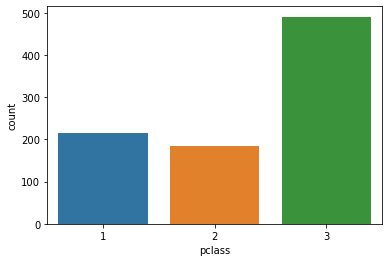

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#########################################################


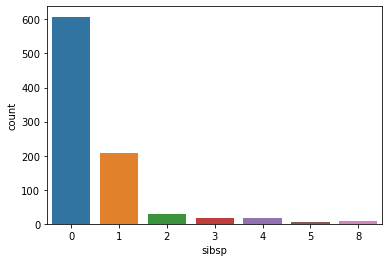

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#########################################################


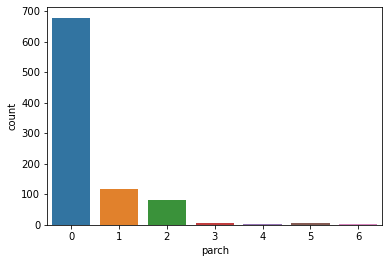

In [22]:
# Tüm değişkenlere uygulamak isterse ; 
# adult_male değişkeni bool bir değişken bu yüzden bunu görselleştirmede sıkıntı yaşayacak   
for col in cat_cols:   
    if df[col].dtypes == "bool":
        print("##################")  
    else: 
        cat_summary(df, col, plot=True)
    


        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################################################


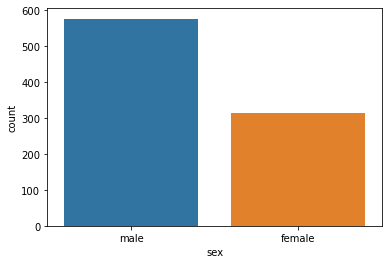

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################################################


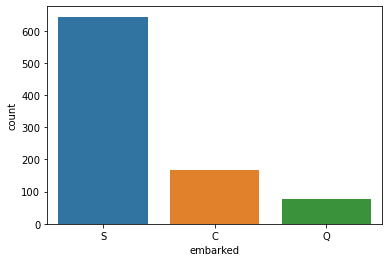

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################################################


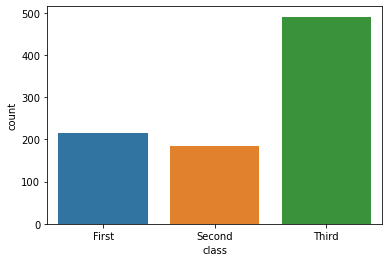

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################################################


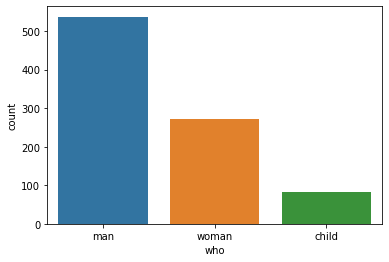

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################################################


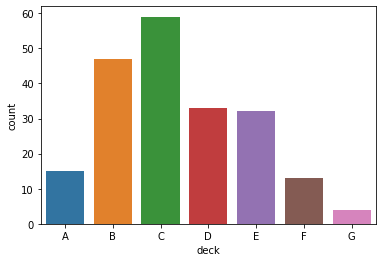

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################################################


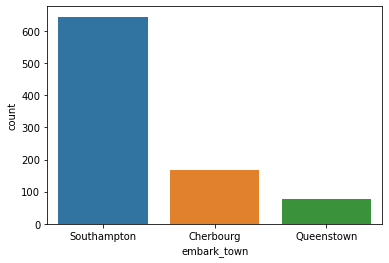

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################################################


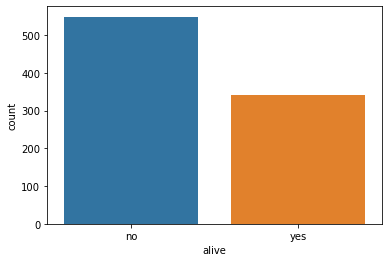

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################################################


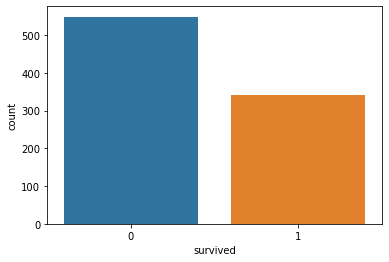

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#########################################################


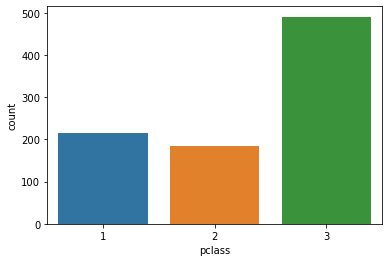

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#########################################################


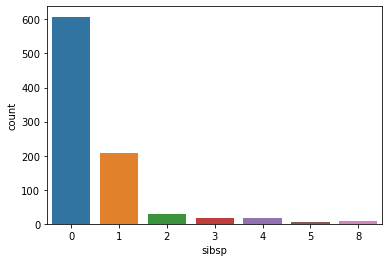

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#########################################################


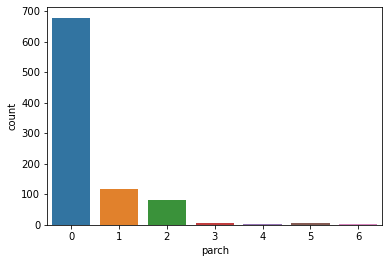

In [23]:
# bool tipini değiştirmek istiyoruz varsayalım ; 

df["adult_male"].astype(int) 

for col in cat_cols:   
    if df[col].dtypes == "bool": 
        df[col] =  df[col].astype(int) 
    else: 
        cat_summary(df, col, plot=True)

### Sayısal Değişken Analizi (Analysis of Numerical Variables) 

In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns',None)
df = sns.load_dataset("titanic") 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
# yas-fare değişkenine erişmek istiyorsak 

df[["age","fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [26]:
# bunun içerisindeki numerik değişkenleri seçme 

num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]] 
num_cols

['age', 'fare']

In [27]:
# num_cols da olup cat_cols ta olmayanları seçme 

num_cols = [col for col in num_cols if col not in cat_cols]

In [28]:
num_cols

['age', 'fare']

In [29]:
# tekrar etmemek için fonksiyon yazacaz 

def num_summary(dataframe,numerical_col):  
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]  
    print(dataframe([numerical_col].describe(quantiles).T)    
 num_summary(df,"age")  
          for col in num_cols:
              num_summary(df,col)

SyntaxError: invalid syntax (4127819684.py, line 6)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


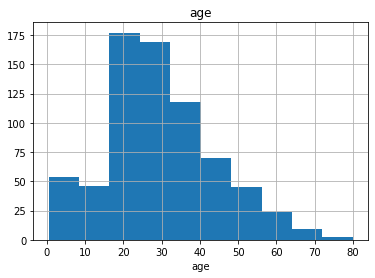

In [30]:
def num_summary(dataframe,numerical_col, plot = False):  
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90] 
    print(dataframe[numerical_col].describe(quantiles).T) 
    
    if plot: 
        dataframe[numerical_col].hist() 
        plt.xlabel(numerical_col)
        plt.title(numerical_col) 
        plt.show(block=True) 

num_summary(df,"age",plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


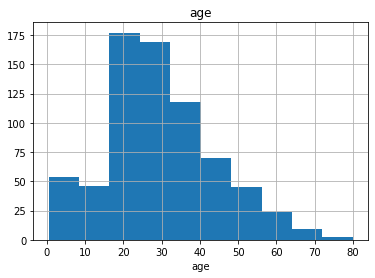

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
max      512.329200
Name: fare, dtype: float64


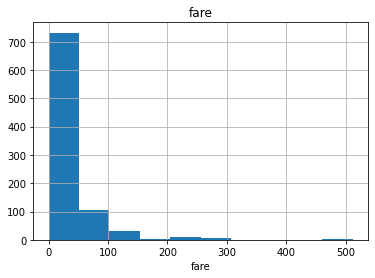

In [31]:
# tek tek yazıyorum fakat bunun fazla olduğunu düşünelim o zaman şu işlemi uygularız 

for col in num_cols: 
    num_summary(df,col,plot=True)

### Değişkenlerin Yakalanması ve İşlemlerin Genelleştirilmesi(Capturing Variables and Generalizing Operations ) 

In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns',None)
df = sns.load_dataset("titanic")   
df.head() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


##### Öyle bir işlem yapmalıyım ki kategorik değişkenleri ayrı - numerik değişkenleri ayrı olarak göstereyim

In [45]:
# eşsiz değer sayısı <10 sa bu bir "kategorik değişkendir", 
# kategorik değişkenin eşsiz değer sayısı >20 ise "kardinal değişken" 
# bir fonksiyona argüman yazma konusu 
# docstring   
def grab_col_names(dataframe, cat_th=10, car_th=20):  
    print(f"Observations:{dataframe.shape[0]}") 
    print(f"Variables:{dataframe.shape[1]}") 
    print(f"cat_cols:{dataframe.shape}") 
    print(f"num_cols:{dataframe.shape}") 
    print(f"cat_but_car:{dataframe.shape}") 
    print(f"num_but_ct:{dataframe.shape}") 
    
    return cat_cols, num_cols, cat_but_car
# PARAMETERS : 

# dataframe : değişkenlerin isimleri alınmak istenen dataframedir 
# car_th: int , float  -> numerik fakat kategorik olan değişkenler için sınıf eşik değeri 
# car_th: int , float  -> kategorik fakat kardinal değişkenler için sınıf eşik değeri 
# Returns ->   
#    cat_cols : list 
#         kategorik değişken listesi  
#    num_cols : list  
#         numerik değişken listesi 
#    cat_but_car: list 
#          kategorik görüntülü kardinal değişken listesi  

# NOTES : 

 # cat_cols + num_cols + cat_but_car = toplam değişken sayısı 
 # num_but_cat cat_cols'un içerisinde. 
 # Return olan 3 liste toplamı değişken sayısına eşittir : cat_cols + num_cols sayısına eşittir


In [47]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations:891
Variables:15
cat_cols:(891, 15)
num_cols:(891, 15)
cat_but_car:(891, 15)
num_but_ct:(891, 15)


NameError: name 'cat_but_car' is not defined

In [48]:
# öğrendiklerimizi toparlayalım 

def cat_summary(dataframe , col_name): 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)})) 

print("#########################################################")   
    
cat_summary(df,"sex")  

for col in cat_cols: 
    cat_summary(df,col)


#########################################################
        sex      Ratio
male    577  64.758698
female  314  35.241302
        sex      Ratio
male    577  64.758698
female  314  35.241302
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
     alive      Ratio
no     549  61.616162
yes    342  38.383838
       alone     Ratio
True     537  60.26936
False    354  39.73064
   survived      

In [50]:
#numerikler için ; 

def num_summary(dataframe,numerical_col):  
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]  
    print(dataframe([numerical_col].describe(quantiles).T)    
 num_summary(df,"age")  
          for col in num_cols:
              num_summary(df,col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


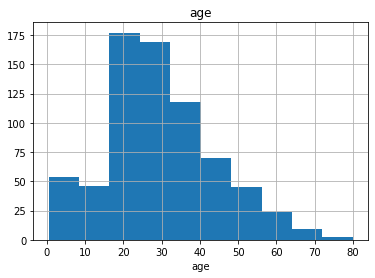

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
max      512.329200
Name: fare, dtype: float64


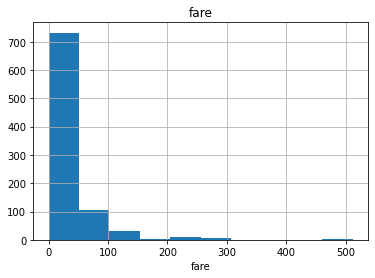

In [51]:
for col in num_cols: 
    num_summary(df,col,plot=True)

In [72]:
# bonus 
# bool ları bul ve int e çevir
df = sns.load_dataset("titanic") 
for col in df.columns:  
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int) 

In [73]:
cat_cols,num_cols , cat_but_car = grab_col_names(df)

Observations:891
Variables:15
cat_cols:(891, 15)
num_cols:(891, 15)
cat_but_car:(891, 15)
num_but_ct:(891, 15)


NameError: name 'cat_but_car' is not defined

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################################################


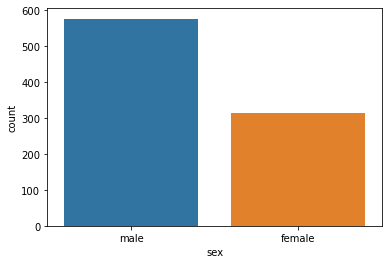

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################################################


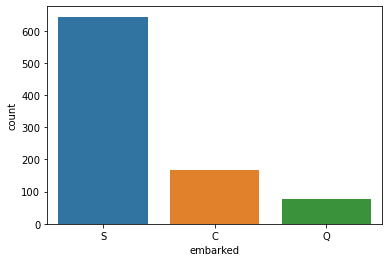

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################################################


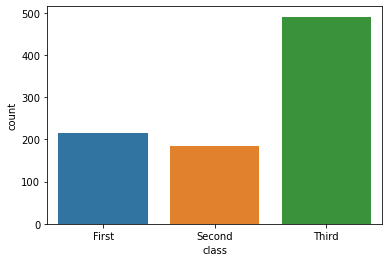

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################################################


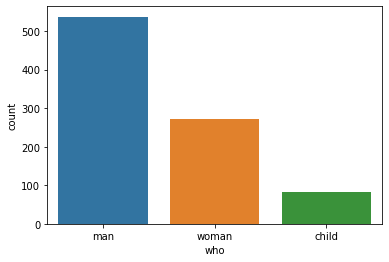

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
#########################################################


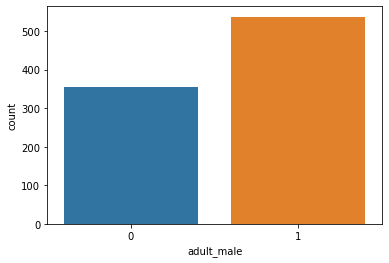

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################################################


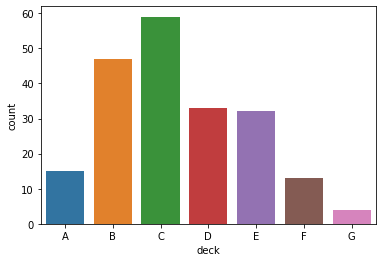

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################################################


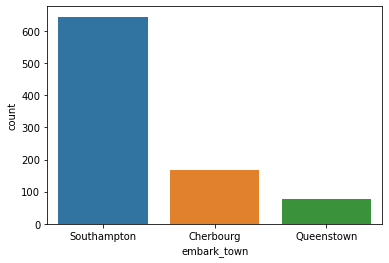

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################################################


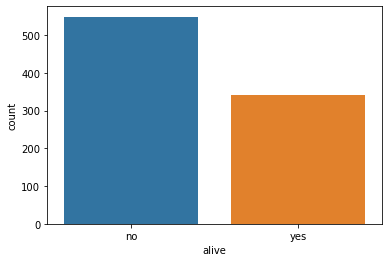

   alone     Ratio
1    537  60.26936
0    354  39.73064
#########################################################


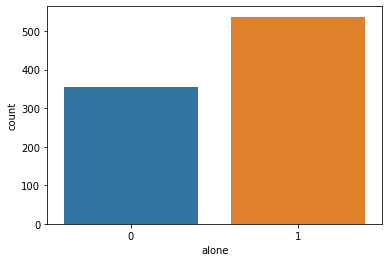

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################################################


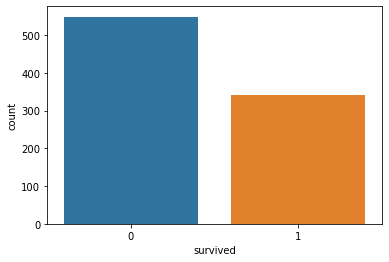

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#########################################################


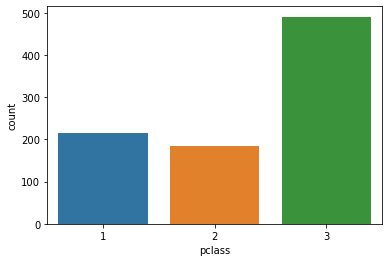

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#########################################################


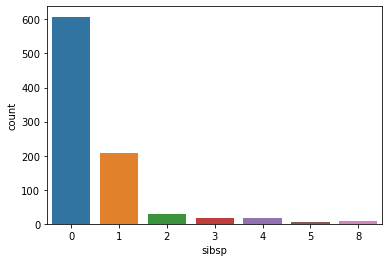

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#########################################################


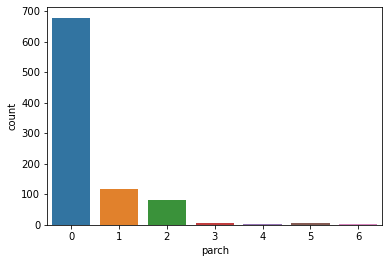

In [74]:
def cat_summary(dataframe , col_name, plot = False): 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)})) 

    print("#########################################################")    
    if plot: 
        sns.countplot(x=dataframe[col_name],data=dataframe) 
        plt.show(block=True)
for col in cat_cols: 
    cat_summary(df,col, plot= True)


### Hedef Değişken Analizi (Analysis of Target Variable)

In [75]:
#örn survived değişkenini analiz etmek istiyoruz 

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [76]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################################################


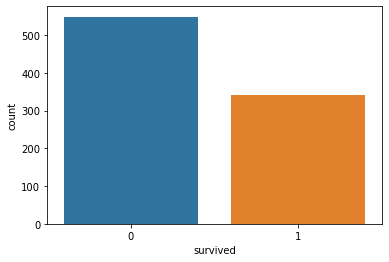

In [78]:
cat_summary(df,"survived",plot=True)

##### Hedef Değişkenin Kategorik Değişkenler ile Analizi 

In [80]:
# hayatta kalma yüzdesi 
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [82]:
def target_summary_with_cat(dataframe, target, categorical_col): 
    print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean()}))

In [83]:
target_summary_with_cat(df,"survived","sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


In [84]:
target_summary_with_cat(df,"survived","pclass")

        TARGET_MEAN
pclass             
1          0.629630
2          0.472826
3          0.242363


In [86]:
# survived ile yani hedef değişkenimizle diğer değişkenleri analiz ettik 
for col in cat_cols: 
    target_summary_with_cat(df,"survived",col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
            TARGET_MEAN
adult_male             
0              0.717514
1              0.163873
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no             0.0
yes            1.0
       TARGET_MEAN
alone             
0         0.505650
1         0.303538
          TARGET_MEAN
survived             
0                 0.0
1             

##### Hedef Değişkenin Sayısal Değişkenler ile Analizi

In [87]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [88]:
# üsttekini şöyle de kullanabiliriz ; 
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [91]:
def target_summary_with_num(dataframe, target, numerical_col): 
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")

In [92]:
target_summary_with_num(df,"survived","age")

                age
survived           
0         30.626179
1         28.343690




In [93]:
for col in num_cols: 
    target_summary_with_num(df,"survived",col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




### Korelasyon Analizi (Analysis of Correlation)

In [121]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option("display.max_columns",None) 
df = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/work_files/datasets/breast_cancer.csv")  
# istenmeyen/problemli değişkenlerden kurtulmak için 1 den -1 e kadar gidiyoruz
df = df.iloc[:,1:-1] 
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
 # amacımız bunları ısı haritası aracılığıyla korelasyonlarına bakmak ve daha sonra yüksek kolerasyonla bazı  
 # değişkenleri dışarda bırakmak istemek  
 # önemli*** 
 # ihtiyac halinde kullanılır , her zaman kullanılmaz -> analiz aracı 

In [122]:
num_cols = [col for col in df.columns if df[col].dtype in [int,float]]

In [124]:
# kolerasyon hesaplamak için "corr" fonksiyonu kullanılır ;  

corr = df[num_cols].corr() 
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [125]:
# kolerasyon : değişkenlerin birbiriyle ilişkisini ifade eden bir ölçümdür -1 ile 1 arasındadır 
# 1 : pozitif korelasyon -1 : negatif korelasyon 
# 1 e yaklaştıkça ilişki şiddeti kuvvetli , -1 e yaklaştıkça ilişki şiddeti azdır. 
# 0 civarında ise "kolerasyon yoktur!!!" 


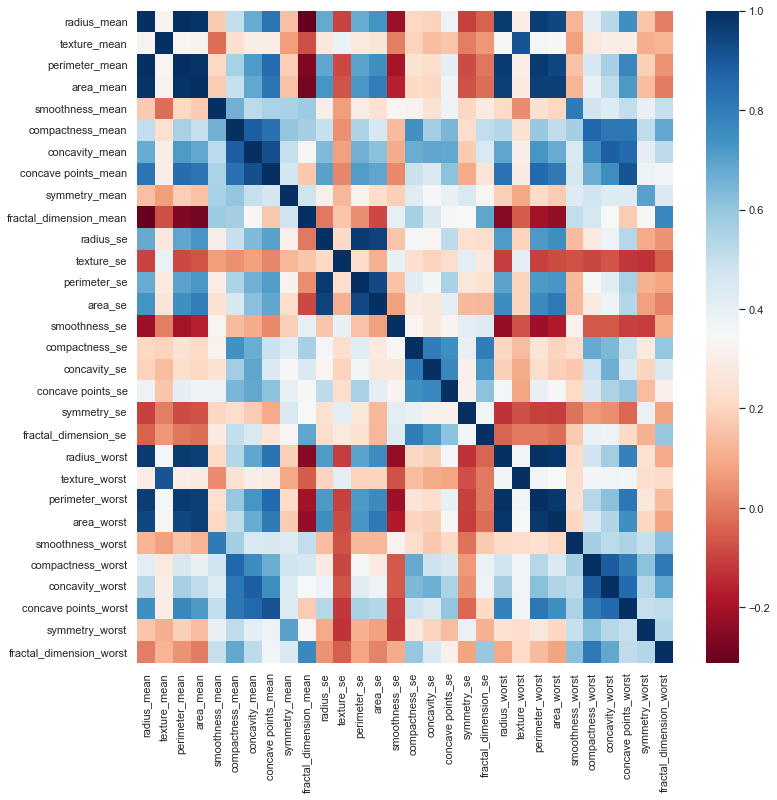

In [126]:
# ısı haritası oluşturalım ; 

sns.set(rc={'figure.figsize':(12,12)}) 
sns.heatmap(corr,cmap="RdBu") 
plt.show()

#### Yüksek Korelasyonlu Değişkenlerin Silinmesi 

In [128]:
# hepsini mutlak değere çeviriyorum,daha kolay şekilde işlem yapmak için

cor_matrix = df.corr().abs()
cor_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [131]:
# numpyın içerisinde yer alan bir fonksiyon tanımlayacağız 
# numpy arrrayını bool a çeviriyoruz  
# NaN ları bulalım
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))  
upper_triangle_matrix

C:\Users\tolga\AppData\Local\Temp\ipykernel_25228\1546588178.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000111,0.164174,0.039830,0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [136]:
# tekrar eden değişkeni sil 

upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))  
drop_list = [col for col in upper_triangle_matrix.columns if any(col)> 0.90 ] 
drop_list

C:\Users\tolga\AppData\Local\Temp\ipykernel_25228\1909527996.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [139]:
# yüksek kolerasyonlu olanları seçmek istersek 
cor_matrix[drop_list]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [141]:
#nasıl sileriz ? 
df.drop(drop_list, axis=1)

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [142]:
def high_correlated_cols(dataframe, plot = False, corr_th = 0.90): 
    corr = dataframe.corr() 
    cor_matrix = corr.abs() 
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) 
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]> corr_th)] 
    
    if plot: 
        import seaborn as sns 
        import matplotlib.pyplot as plt 
        sns.set(rc = {'figure.figsize':(15,15)}) 
        sns.heatmap(corr, cmap="RdBu") 
        plt.show() 
    return drop_list 

In [143]:
high_correlated_cols(df)

C:\Users\tolga\AppData\Local\Temp\ipykernel_25228\1345792884.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

C:\Users\tolga\AppData\Local\Temp\ipykernel_25228\1345792884.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


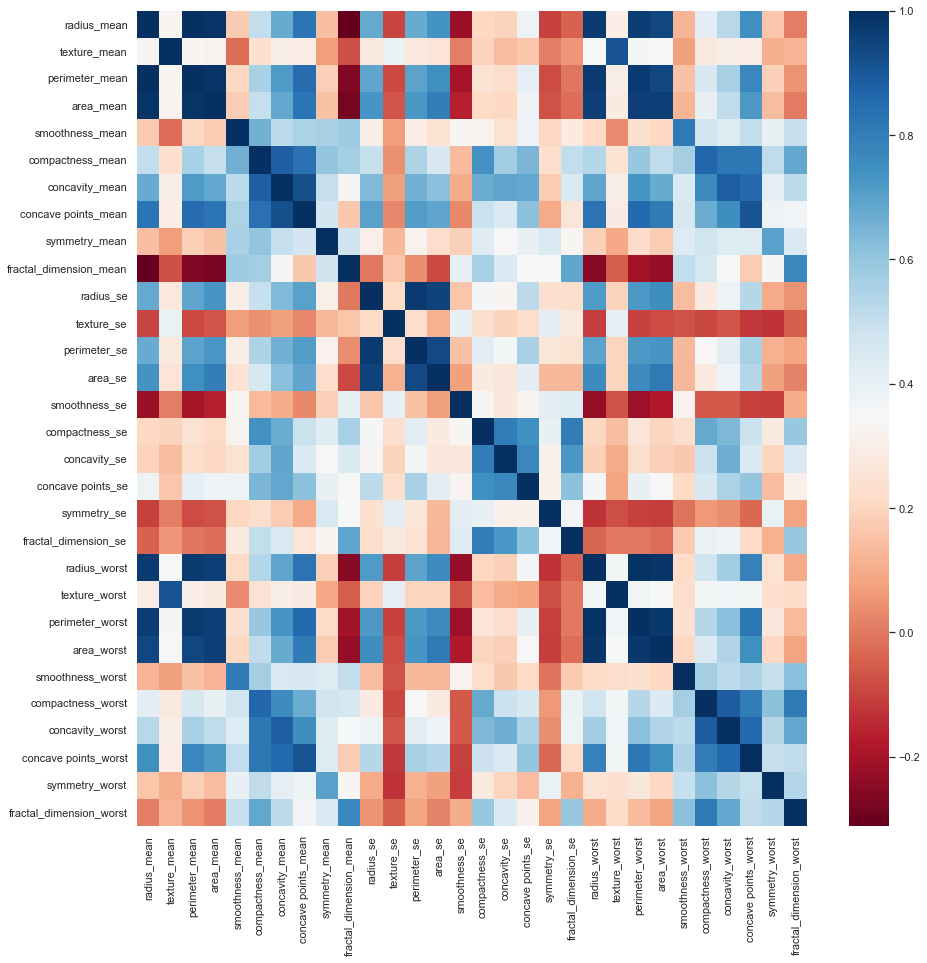

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [146]:
# kaydetmek için 
drop_list = high_correlated_cols(df, plot=True) 
drop_list

C:\Users\tolga\AppData\Local\Temp\ipykernel_25228\1345792884.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


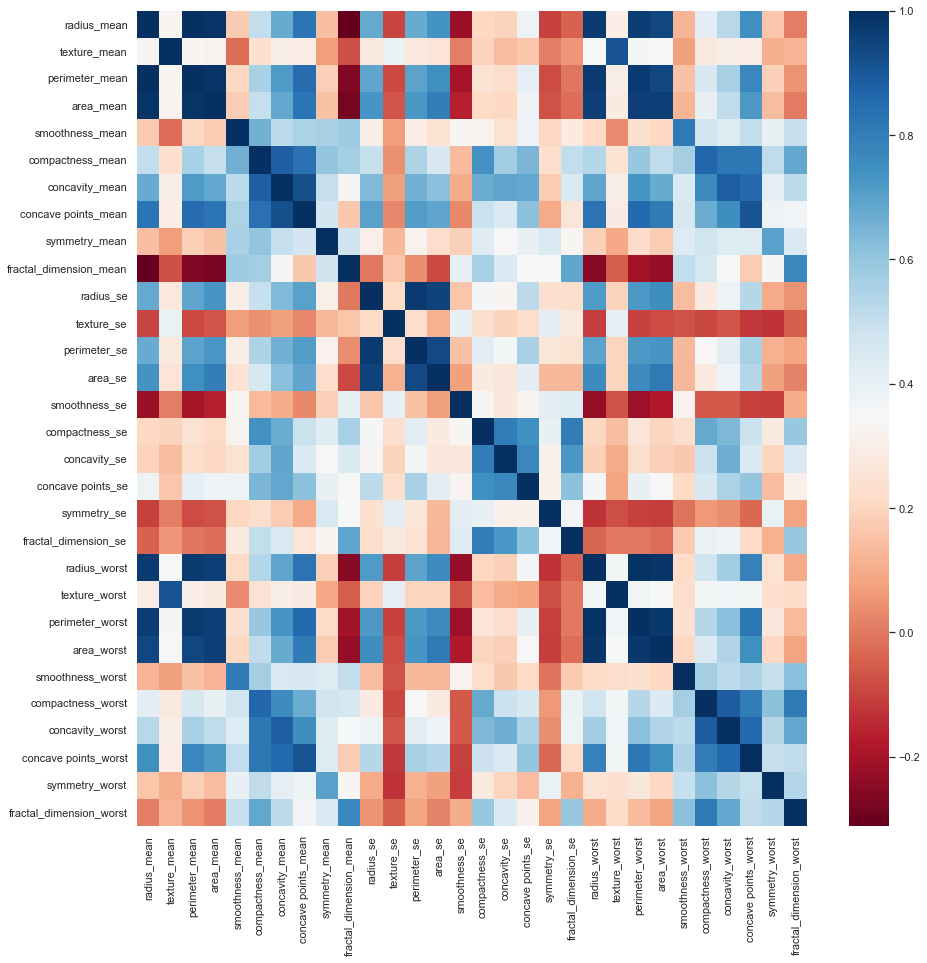

C:\Users\tolga\AppData\Local\Temp\ipykernel_25228\1345792884.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


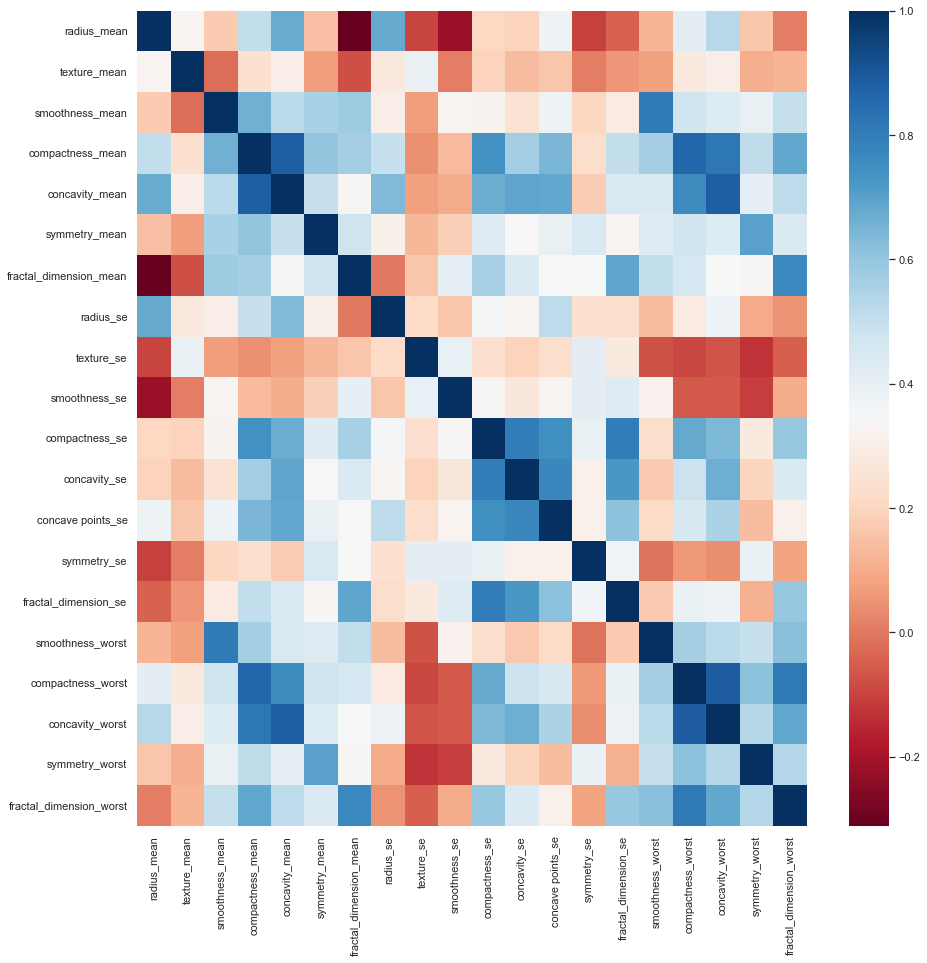

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [147]:
# yüksek kolerasyonları, ısı ölçülerinin silinmesini istiyoruz görüntüde kırmızı ve mavilerin yüksek olduğu yerler gitti
drop_list = high_correlated_cols(df, plot=True)  
df.drop(drop_list, axis=1) 
high_correlated_cols(df.drop(drop_list, axis=1),plot=True)
drop_list
